# Funciones de distribución de probabilidades
## Distribución Uniforme

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
a = 1 #Límite inferior
b = 100 #Límite superior
n = 1000 #Número de muestras

data = np.random.uniform(a,b,n)

(array([ 95.,  93., 111., 102., 110., 105.,  99.,  89.,  93., 103.]),
 array([ 1.00898699, 10.90790732, 20.80682764, 30.70574796, 40.60466829,
        50.50358861, 60.40250893, 70.30142926, 80.20034958, 90.0992699 ,
        99.99819023]),
 <a list of 10 Patch objects>)

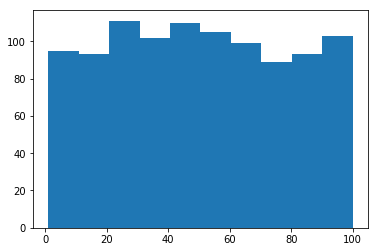

In [3]:
plt.hist(data)

## Distribución Normal (Campana de Gauss)

In [4]:
data = np.random.randn(1000000) #Como parámetro, el número de valores aleatorios que quiero generar en distribución normal

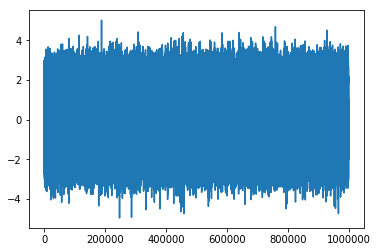

In [5]:
x = range(1,1000001)
plt.plot(x,data)

(array([3.60000e+01, 1.52500e+03, 2.27880e+04, 1.40510e+05, 3.44590e+05,
        3.37134e+05, 1.31549e+05, 2.05290e+04, 1.31900e+03, 2.00000e+01]),
 array([-4.96242969, -3.9647678 , -2.96710591, -1.96944403, -0.97178214,
         0.02587975,  1.02354163,  2.02120352,  3.0188654 ,  4.01652729,
         5.01418918]),
 <a list of 10 Patch objects>)

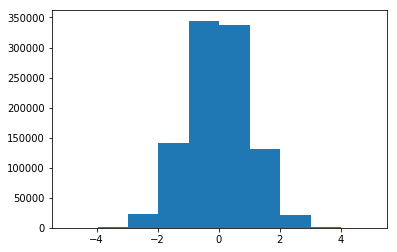

In [6]:
plt.hist(data)

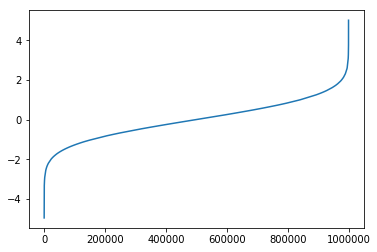

In [7]:
plt.plot(x,sorted(data))

(array([   8.,   67.,  452., 1473., 2768., 2888., 1727.,  511.,   97.,
           9.]),
 array([-4.5332134 , -2.55749112, -0.58176884,  1.39395344,  3.36967572,
         5.345398  ,  7.32112028,  9.29684255, 11.27256483, 13.24828711,
        15.22400939]),
 <a list of 10 Patch objects>)

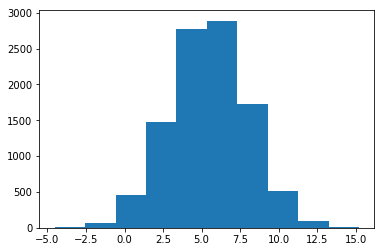

In [8]:
mu = 5.5 #Media
sd = 2.5 #Desviación estándar
Z_10000 = np.random.randn(10000)
data = mu + sd*Z_10000 # Z = (X - mu)/sd -> N(0,1), X = mu + sd*Z -->Teorema central del límite

plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[-0.13626065, -0.32875979, -0.0490877 ,  1.39847246],
       [ 0.32636963, -1.41602082, -1.15375311,  2.0604243 ]])

## La simulación de Monte Carlo

* Generamos dos números x e y aleatorios entre 0 y 1 en total 1000 veces.
* Calcularemos x^2 + y^2.
    * Si el valor es < 1 -> estamos dentro del círculo
    * Si el valor es > 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximas el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []

    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z <= 1: #Dentro del círculo
                value += 1 #Nuevo candidato
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    
    pi = pi_avg/n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi,fig)

3.1412480000000005


(3.1412480000000005, [<matplotlib.lines.Line2D at 0x1234e6940>])

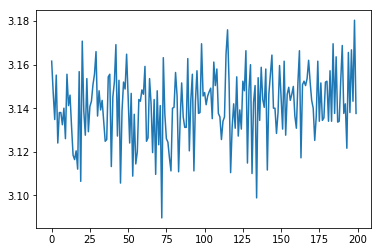

In [11]:
pi_montecarlo(10000,200)

### Dummy Data Sets

In [17]:
n = 100000

data = pd.DataFrame(
    {
        "A": np.random.randn(n), #Desviación normal estándar
        "B": 1.5 + 2.5*np.random.randn(n), #Desviación normal con media = 1.5 y desviación típica = 2.5
        "C": np.random.uniform(5,32,n) #Desviación uniforme
    }
)

In [19]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,-0.001511,1.492197,18.498868
std,1.001558,2.499476,7.798030
min,-4.801161,-10.677273,5.000399
25%,-0.683210,-0.195459,11.779017
50%,-0.004161,1.492203,18.465500
75%,0.676364,3.187492,25.243328
max,4.474989,14.029646,31.998527


(array([5.0000e+00, 1.4800e+02, 2.0120e+03, 1.1686e+04, 2.9804e+04,
        3.4118e+04, 1.7692e+04, 4.0850e+03, 4.2700e+02, 2.3000e+01]),
 array([-4.80116132, -3.87354626, -2.94593119, -2.01831613, -1.09070107,
        -0.16308601,  0.76452905,  1.69214411,  2.61975917,  3.54737423,
         4.47498929]),
 <a list of 10 Patch objects>)

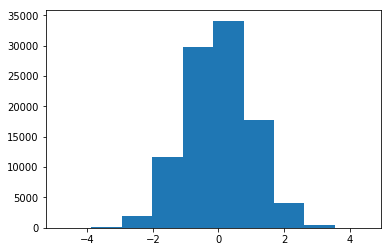

In [20]:
plt.hist(data["A"])

(array([9.0000e+00, 1.7900e+02, 2.6130e+03, 1.5281e+04, 3.4846e+04,
        3.2753e+04, 1.2340e+04, 1.8560e+03, 1.1900e+02, 4.0000e+00]),
 array([-10.6772733 ,  -8.20658136,  -5.73588942,  -3.26519748,
         -0.79450554,   1.67618639,   4.14687833,   6.61757027,
          9.08826221,  11.55895415,  14.02964609]),
 <a list of 10 Patch objects>)

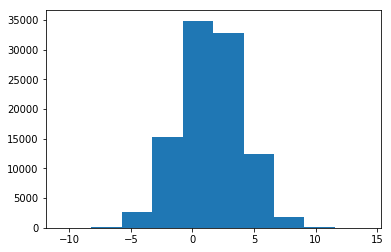

In [21]:
plt.hist(data["B"])

(array([10060.,  9859., 10046., 10123., 10050.,  9857.,  9925., 10068.,
         9917., 10095.]),
 array([ 5.00039884,  7.70021167, 10.40002449, 13.09983732, 15.79965014,
        18.49946297, 21.19927579, 23.89908862, 26.59890144, 29.29871427,
        31.9985271 ]),
 <a list of 10 Patch objects>)

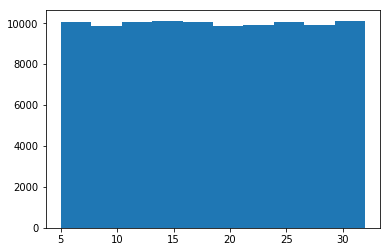

In [22]:
plt.hist(data["C"])

In [25]:
mainpath = "/Users/diegogarcia-viana/Desktop/Curso machine learning & data scientist/python-ml-course/datasets"
filename = "customer-churn-model/Customer Churn Model.txt"
data = pd.read_csv(os.path.join(mainpath, filename))

In [26]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [27]:
column_names = data.columns.values.tolist()

In [30]:
a = len(column_names)

In [37]:
new_data = pd.DataFrame(
    {
        "Column Name": column_names,
        "A": np.random.randn(a), 
        "B": np.random.uniform(0,1,a) 
    }, index = range(42,42+a)
)

In [38]:
new_data.head()

,Column Name,A,B
42,State,0.172397,0.951297
43,Account Length,-1.311421,0.068624
44,Area Code,-0.576107,0.563647
45,Phone,-0.844924,0.594830
46,Int'l Plan,0.726694,0.652735
